## Load the dataset and display the dataframe (2 Points).


In [69]:
import pandas as pd 

df_shopping = pd.read_csv("online_shoppers_intention.csv")

print(df_shopping.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

## Use `describe` to provide statistics on the pandas Dataframe (2 Points).


In [70]:
df_shopping.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [71]:
df_shopping["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).


In [72]:
from sklearn.model_selection import train_test_split

# "Revenue" is the target variable 

X = df_shopping.drop("Revenue", axis =1)
y = df_shopping["Revenue"]

# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
# categorical variables for one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,False,False,True,False,False,False,False,False,False,True
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,False,False,False,False,True,False,False,False,False,True
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,True,False,False,False,False,False,False,True
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,False,False,False,False,False,False,True,True,False,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,False,False,False,False,True,False,False,True,False,False


In [74]:
# Ensure that train and test set have the same columns after encoding
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)

# Classification Routine (12 Points):

Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).

## RandomForestClassifier():


In [75]:
import random
from seaborn.palettes import color_palette
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [76]:
random.seed(1276)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#k-fold cross validation
k=10

In [77]:
rfc = RandomForestClassifier(random_state=1276)
rfc_acc = cross_val_score(rfc, X_train, y_train, cv=k, scoring='accuracy')

## BaggingClassifier():


In [78]:
bc = BaggingClassifier(random_state=1276)
bc_acc = cross_val_score(bc, X_train, y_train, cv=k, scoring='accuracy')

## XGboostclassifier():


In [79]:
xgb = XGBClassifier(random_state=1276)
xgb_acc = cross_val_score(xgb, X_train, y_train, cv=k, scoring='accuracy')

Visualization


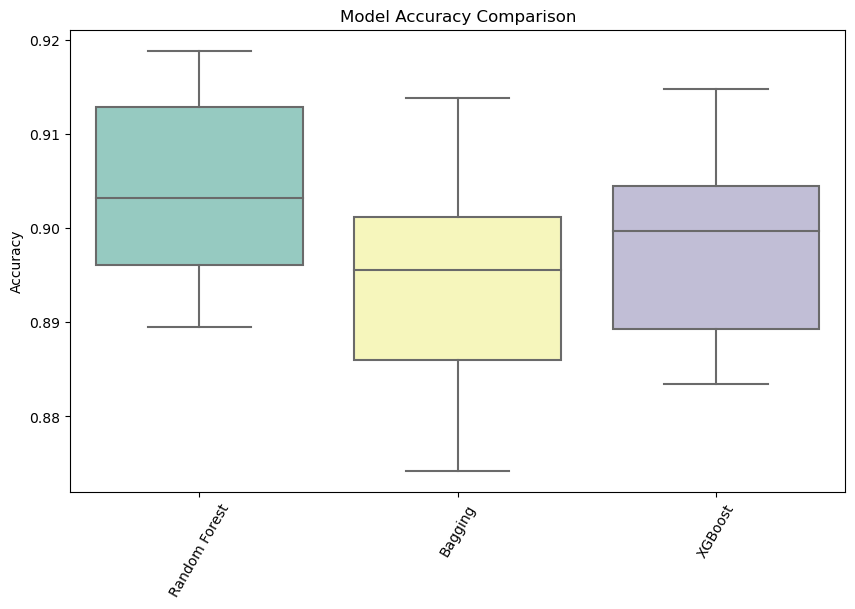

In [80]:
my_acc = [rfc_acc, bc_acc, xgb_acc]
my_labels = ['Random Forest', 'Bagging', 'XGBoost']

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=my_acc, palette='Set3')
ax.set_xticklabels(my_labels, rotation=60)
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
plt.show()

Without any specification (the default n_estimator = 10 and max_samples =1), Random Forest model performs better overall with the median accuracy score above 0.90 

(From the previous trial) For the same number of base estimators (100), the result shows that XGBoost Classifier performs the best in terms of accuracy in predicting customers' shopping intent.

# Classification with GridSearchCV (8 Points):

Replicate the classification from Q2 using GridsearchCV().


In [81]:
params = {'n_estimators':  [5, 10, 100],
            'random_state': [1276]
            }

rfc_grid = GridSearchCV(rfc, params, cv=k, scoring='accuracy', n_jobs=-1)
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1276),
             n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 100], 'random_state': [1276]},
             scoring='accuracy')

In [82]:
#show the best hyperparameters for rfc
print(f"Best parameters for Random Forest: {rfc_grid.best_params_}")

Best parameters for Random Forest: {'n_estimators': 100, 'random_state': 1276}


After evaluating the random forest classifier with 3 different parameter combinations, the best parameters for random forests would be 300 base estimators are used in the ensemble (maximum available option). 


In [83]:
params = {'n_estimators': [5, 10, 100],
            'random_state': [1276]
            }
bc_grid = GridSearchCV(bc, params, cv=k, scoring='accuracy', n_jobs=-1)

bc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(random_state=1276), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 100], 'random_state': [1276]},
             scoring='accuracy')

In [84]:
print(f"Best parameters for Bagging: {bc_grid.best_params_}")

Best parameters for Bagging: {'n_estimators': 100, 'random_state': 1276}


In [85]:

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    params = {'n_estimators':  [5, 10, 100],
          # 'max_depth': [3, 5, 7],
            'random_state': [1276]
            }
    xgb_grid = GridSearchCV(xgb, params, cv=k, scoring='accuracy', n_jobs=-1)
    xgb_grid.fit(X_train, y_train)



/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [86]:
print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")

Best parameters for XGBoost: {'n_estimators': 10, 'random_state': 1276}


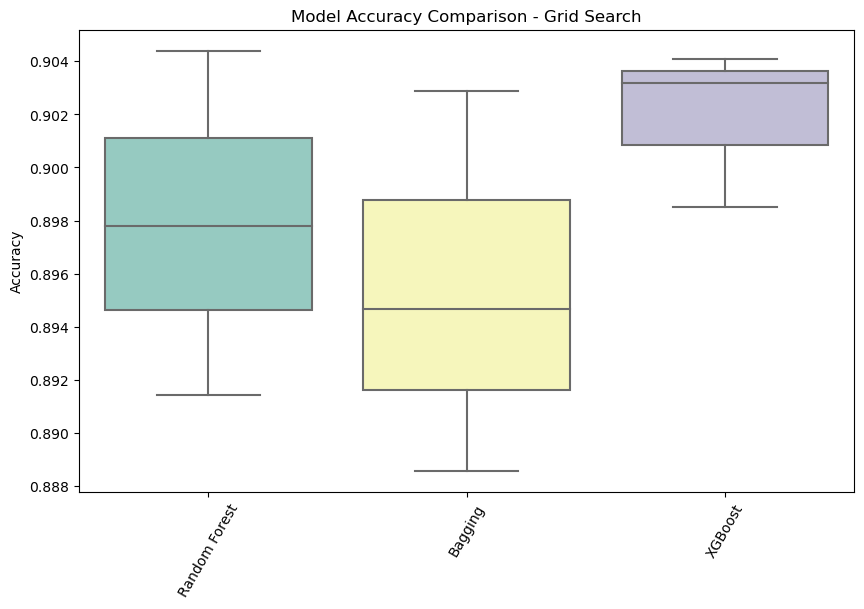

In [87]:
rfc_results = rfc_grid.cv_results_['mean_test_score']
bc_results = bc_grid.cv_results_['mean_test_score']
xgb_results = xgb_grid.cv_results_['mean_test_score']

all = [rfc_results, bc_results, xgb_results]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=all, palette='Set3')
ax.set_xticklabels(my_labels, rotation=60)
ax.set_title('Model Accuracy Comparison - Grid Search')
ax.set_ylabel('Accuracy')
plt.show()

The XGBoost performs the best even though it only needs 10 base estimators (whereas for the other two were 100)

(From previous trial) The box plots show that Random Forest has the widest range of accuracy scores among the three models, whereas the bagging model is the most consistent with the highest mean accuracy scores. 

# Classification with RandomSearchCV (8 Points):

Replicate the classification from Q2 using RandomSearchCV().


In [88]:
params = {'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'random_state': [1276]
            }

rfc_random = RandomizedSearchCV(rfc, params, cv=k, scoring='accuracy', n_jobs=-1)
rfc_random.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rfc_random.best_params_}")

Best parameters for Random Forest: {'random_state': 1276, 'n_estimators': 200, 'max_depth': 7}


In [89]:
params = {'n_estimators': [100, 200, 300],
            'max_samples': [100, 200, 300],
            'random_state': [1276]
            }

bc_random = RandomizedSearchCV(bc, params, cv=k, scoring='accuracy', n_jobs=-1)
bc_random.fit(X_train, y_train)

print(f"Best parameters for Bagging: {bc_random.best_params_}")

Best parameters for Bagging: {'random_state': 1276, 'n_estimators': 100, 'max_samples': 200}


In [90]:
params = {'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'random_state': [1276]
            }

xgb_random = RandomizedSearchCV(xgb, params, cv=k, scoring='accuracy', n_jobs=-1)
xgb_random.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_random.best_params_}")

/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Best parameters for XGBoost: {'random_state': 1276, 'n_estimators': 100, 'max_depth': 3}


/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

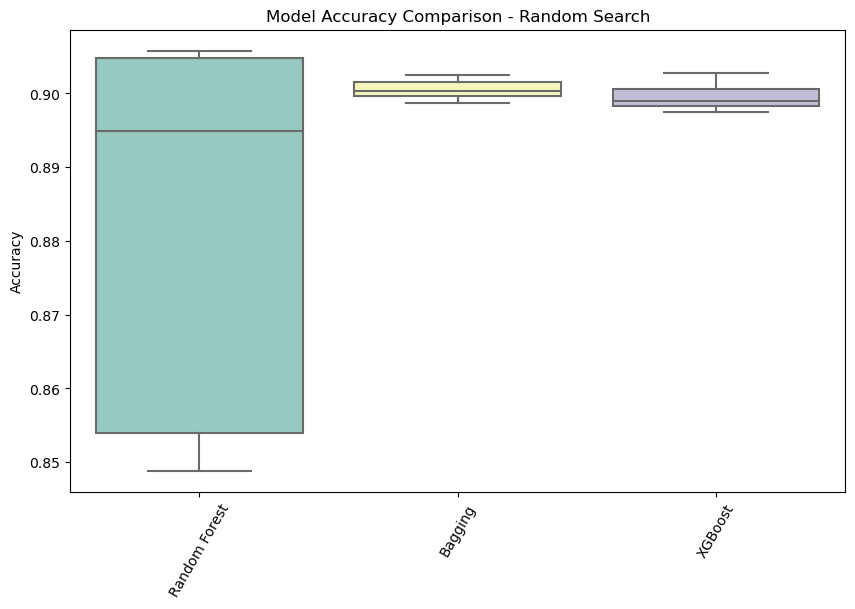

In [91]:
rfc_rscores = rfc_random.cv_results_['mean_test_score']
bc_rscores = bc_random.cv_results_['mean_test_score']
xgb_rscores = xgb_random.cv_results_['mean_test_score']

all = [rfc_rscores, bc_rscores, xgb_rscores]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=all, palette='Set3')
ax.set_xticklabels(my_labels, rotation=60)
ax.set_title('Model Accuracy Comparison - Random Search')
ax.set_ylabel('Accuracy')
plt.show()

# Comparison and Analysis (5 Points):

Compare the results from Q2, Q3, and Q4. Describe the best hyperparameters for all three experiments.


In [92]:
print(f"Best parameters for Random Forest: {rfc_grid.best_params_}")
print(f"Best parameters for Bagging: {bc_grid.best_params_}")
print(f"Best parameters for XGBoost: {xgb_grid.best_params_}")

Best parameters for Random Forest: {'n_estimators': 100, 'random_state': 1276}
Best parameters for Bagging: {'n_estimators': 100, 'random_state': 1276}
Best parameters for XGBoost: {'n_estimators': 10, 'random_state': 1276}


One of the key takeaways for me is that hyperparameters tuning really requires a deep understanding of the data and the modeling efforts. Understanding the nature of the data and also the problem can be very helpful. For example, the shopping intent dataset has many features and it might make sense to adjust "max_features" to find the right number. The "max_depth" can control overfitting and also ensure computational efficiency. Overall, we do see that most models performed around the 0.90 accuracy score threshold which is a very good sign. Hyperparameter tuning is both an art and a science. While there are systematic methods to search for the best parameters, intuition on understanding the data and selecting the right parameters for tuning play a significant role as well. 
